# Métodos de Diferenciación numérica
### Luis Daniel Amador Islas

### 1. Diferenciación numérica.
Crea una función $\texttt{f(x)}$ que deuelva $1 + \frac{1}{2} \tanh 2x$. luego usa **diferencias centrales** para calcular numéricamente la derivada de la función en el intervalo $-2 \leq x \leq 2$.
Después, calcular la derivada analíticamente y haz una gŕafica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: Usa la función $\texttt{tanh}$ del paquete $\texttt{math}$)

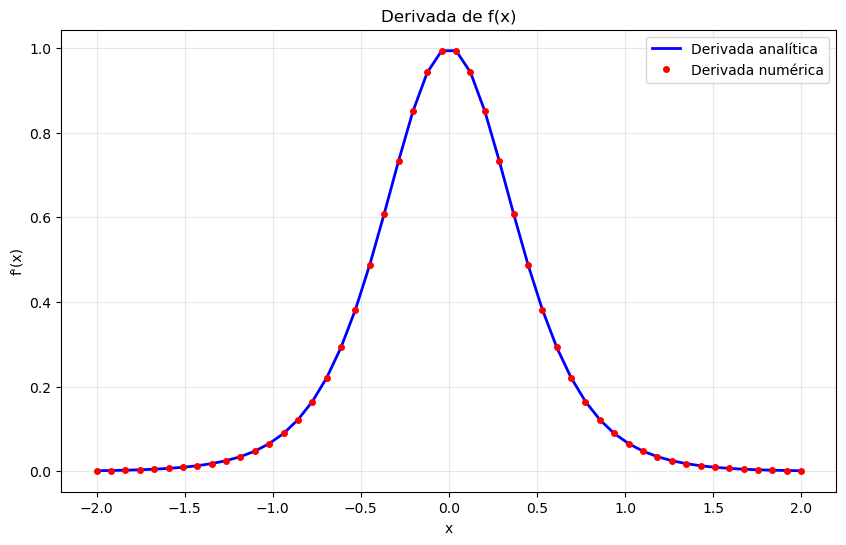

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import tanh
def f(x):
    return 1 + 0.5 * tanh(2 * x)

def derivada_analitica(x):
    return 1 - (tanh(2 * x))**2

def derivada_numerica(x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

x_vals = np.linspace(-2, 2, 50)

# Calcular derivadas
deriv_analitica = [derivada_analitica(x) for x in x_vals]
deriv_numerica = [derivada_numerica(x) for x in x_vals]

# Graficar
plt.figure(figsize=(10, 6))

plt.plot(x_vals, deriv_analitica, 'b-', linewidth=2, label='Derivada analítica')

plt.plot(x_vals, deriv_numerica, 'ro', markersize=4, label='Derivada numérica')

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title('Derivada de f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.Campo eléctrico de una distrbución de cargas

Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico $\phi$ y luego tomar su gradiente.

Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es $\phi = q/4\pi\epsilon_0 r$ y el campo eléctrico es $\bar{E} = -\nabla \phi$

_a)_ Suponiendo que tienes dos cargas de +1C y -1C respectivamente, separadas 10 cm. Calcula el potencial electrico resultante en un plano cuadrado de 1 m$\times$1 m que rodea las cargas y pasa atraves de ellas. Calcula el potencial en puntos espaciados a 1 cm en una cuadrícula y haz una visualización en la pantalla del potencial usando un gráfico de densidad.

Tenemos:

- Carga $q_1 = +1 \ \text{C}$ en posición $\vec{r}_1 = (0, 0, 0)$
- Carga $q_2 = -1 \ \text{C}$ en posición $\vec{r}_2 = (0.1, 0, 0)$ metros (10 cm de separación en el eje $x$)
- Constante $k = \frac{1}{4\pi\epsilon_0} \approx 8.9875\times 10^9 \ \text{N·m}^2/\text{C}^2$

Queremos el potencial eléctrico en un plano cuadrado de $1 \text{ m} \times 1 \text{ m}$ que pasa a través de las cargas, con puntos espaciados cada 1 cm.

El potencial debido a $N$ cargas puntuales en un punto $\vec{r}$ es:

$$
\phi(\vec{r}) = \sum_{i=1}^N \frac{k \, q_i}{|\vec{r} - \vec{r}_i|}
$$

Para dos cargas:

$$
\phi(x, y, z) = k\left[ \frac{q_1}{\sqrt{(x - x_1)^2 + (y - y_1)^2 + (z - z_1)^2}} + \frac{q_2}{\sqrt{(x - x_2)^2 + (y - y_2)^2 + (z - z_2)^2}} \right]
$$

En nuestro caso:

$$
\phi(x, y, 0) = k\left[ \frac{+1}{\sqrt{x^2 + y^2}} + \frac{-1}{\sqrt{(x - 0.1)^2 + y^2}} \right]
$$

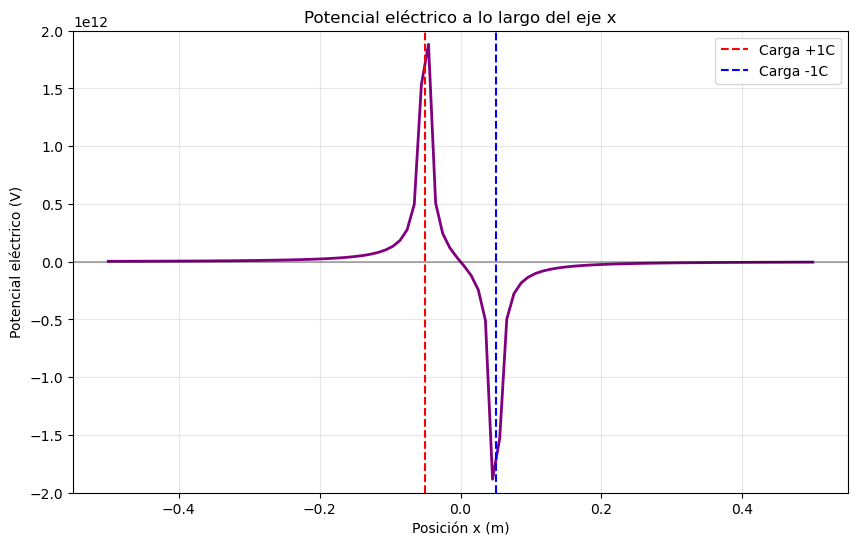

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb
k = 8.9875e9

x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)

# Calcular potencial en cada punto
potencial = []
for pos in x:
    # Distancia a la carga +1C en x = -0.05
    r1 = abs(pos - (-0.05))
    # Distancia a la carga -1C en x = 0.05
    r2 = abs(pos - 0.05)
    
    if r1 < 0.001:
        potencial.append(1e15)
    elif r2 < 0.001:
        potencial.append(-1e15)
    else:
        # φ = k*(q1/r1 + q2/r2)
        phi = k * (1/r1 - 1/r2)
        potencial.append(phi)

plt.figure(figsize=(10, 6))
plt.plot(x, potencial, 'purple', linewidth=2)
plt.axvline(x=-0.05, color='red', linestyle='--', label='Carga +1C')
plt.axvline(x=0.05, color='blue', linestyle='--', label='Carga -1C')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Posición x (m)')
plt.ylabel('Potencial eléctrico (V)')
plt.title('Potencial eléctrico a lo largo del eje x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2e12, 2e12)  # Límites para mejor visualización
plt.show()


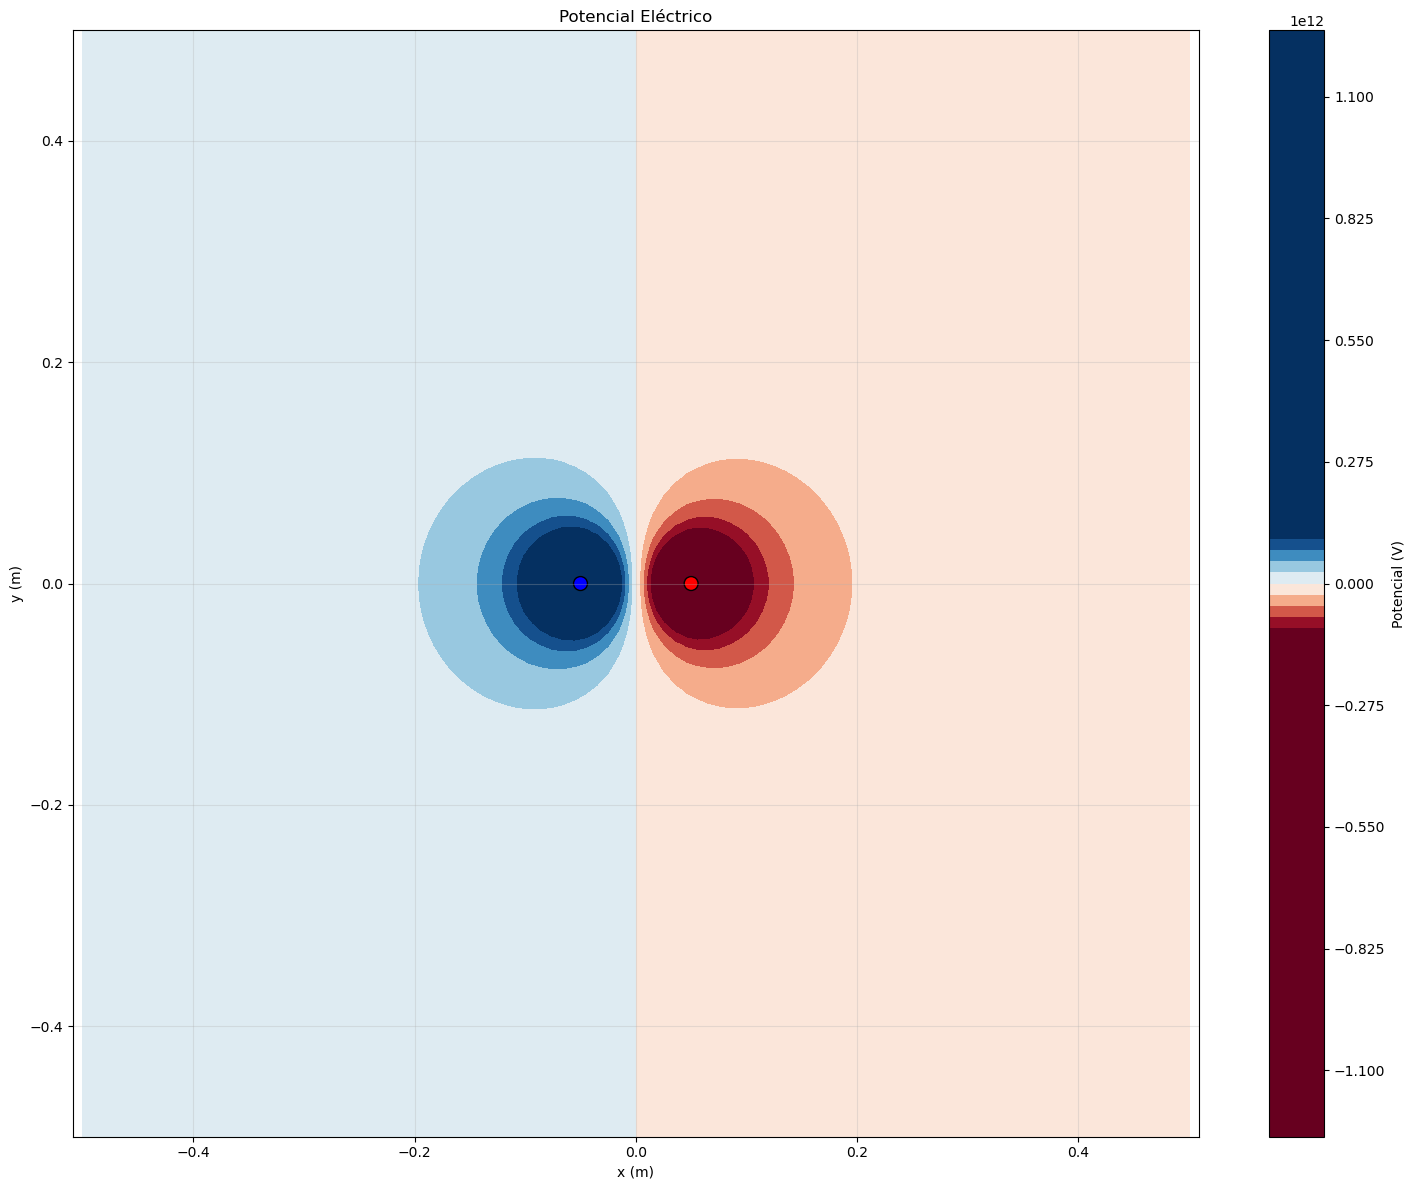

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb
k = 8.9875e9

x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)

# Calcular potencial en cada punto de la malla 2D
V = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        # Distancia a la carga +1C en (-0.05, 0)
        r1 = np.sqrt((X[i,j] - (-0.05))**2 + (Y[i,j] - 0)**2)
        # Distancia a la carga -1C en (0.05, 0)
        r2 = np.sqrt((X[i,j] - 0.05)**2 + (Y[i,j] - 0)**2)
        
        if r1 < 0.001:
            V[i,j] = 1e15
        elif r2 < 0.001:
            V[i,j] = -1e15
        else:
            # φ = k*(q1/r1 + q2/r2)
            V[i,j] = k * (1/r1 - 1/r2)

# Crear figura
plt.figure(figsize=(15, 12))

# Crear contour plot acotado con colormap 'hot'
contour = plt.contourf(X, Y, V, levels=100, cmap='RdBu', vmin=-1e11, vmax=1e11)
plt.colorbar(contour, label='Potencial (V)')
plt.scatter([-0.05, 0.05], [0, 0], c=['blue', 'red'], s=100, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial Eléctrico')
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

_b)_ Ahora calcula las derivadas parciales del potencial con respecto a $x$ y $y$, para encontrar el campo eléctrico en el plano $xy$ y realiza una visualización de dicho campo.

Lo anterior es un poco más complicado que visualizar el potencial, porque el campo eléctrico tiene magnitud y dirección. Una forma de hacerlo podría ser hacer dos gráficos de densidad: uno para la magnitud y otro para la dirección, este último usando el esquema de color “hsv” en `pylab`, que es un esquema de arcoíris que pasa por todos los colores pero comienza y termina con el mismo tono de rojo, lo que lo hace adecuado para representar cosas como direcciones o ángulos que dan la vuelta al círculo completo y terminan donde comenzaron. Una visualización más sofisticada podría usar el objeto de flecha del paquete `visual`, dibujando una cuadrícula de flechas con la dirección y longitud elegidas para representar el campo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
k = 8.9875e9

x = np.linspace(-0.5, 0.5, 50)
y = np.linspace(-0.5, 0.5, 50)
X, Y = np.meshgrid(x, y)

# Espaciado de la cuadrícula
h = x[1] - x[0]  # mismo espaciado en x e y

V = np.zeros_like(X)

q1_pos = [-0.05, 0]  # Carga -1C
q2_pos = [0.05, 0]   # Carga +1C

# Calcular potencial en cada punto
for i in range(len(x)):
    for j in range(len(y)):
        # Vector posición del punto
        rx = X[j,i]
        ry = Y[j,i]
        
        # Distancia a carga -1C
        r1 = np.sqrt((rx - q1_pos[0])**2 + (ry - q1_pos[1])**2)
        
        # Distancia a carga +1C
        r2 = np.sqrt((rx - q2_pos[0])**2 + (ry - q2_pos[1])**2)

        if r1 < 0.01:
            V[j,i] = 1e15
        elif r2 < 0.01:
            V[j,i] = -1e15
        else:
            V[j,i] = k * (1.0/r1 - 1.0/r2)

# E = -∇V = -(∂V/∂x, ∂V/∂y)
Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        # Derivada parcial respecto a x
        dV_dx = (V[j, i+1] - V[j, i-1]) / (2 * h)
        # Derivada parcial respecto a y  
        dV_dy = (V[j+1, i] - V[j-1, i]) / (2 * h)
        
        Ex[j, i] = -dV_dx
        Ey[j, i] = -dV_dy

# Calcular magnitud y dirección del campo
magnitud = np.sqrt(Ex**2 + Ey**2)
direccion = np.arctan2(Ey, Ex)

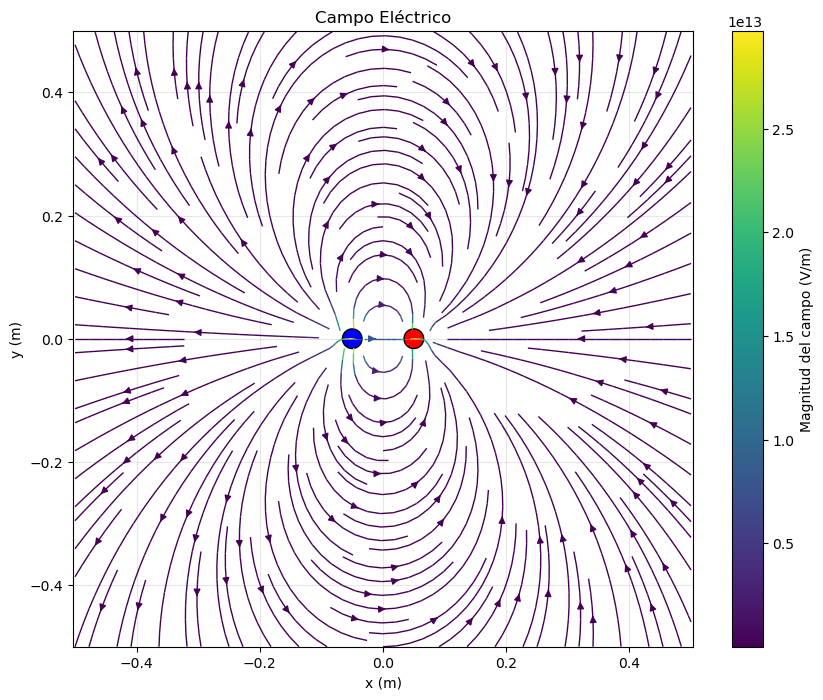

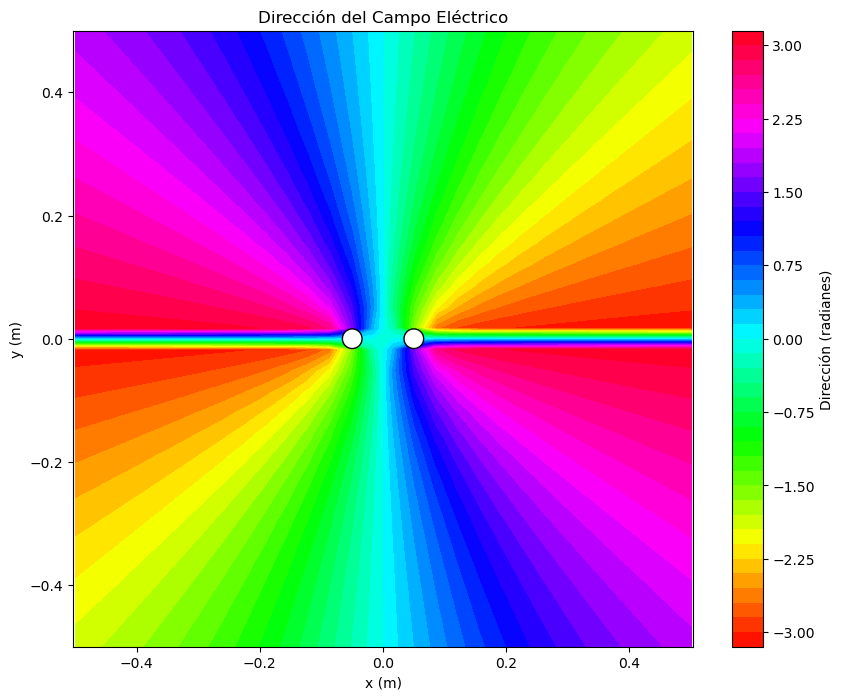

In [25]:
import numpy as np
# Cargar los datos calculados
datos = np.load('campo_electrico.npz')
X = datos['X']
Y = datos['Y']
Ex = datos['Ex']
Ey = datos['Ey']
magnitud = datos['magnitud']
direccion = datos['direccion']

#Flechas del campo eléctrico
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, Ex, Ey, color=magnitud, cmap='viridis', linewidth=1, density=1.5)
plt.colorbar(label='Magnitud del campo (V/m)')
plt.scatter([-0.05, 0.05], [0, 0], c=['blue', 'red'], s=200, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo Eléctrico')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

# Dirección del campo
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, direccion, levels=50, cmap='hsv')
plt.colorbar(label='Dirección (radianes)')
plt.scatter([-0.05, 0.05], [0, 0], c=['white', 'white'], s=200, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Dirección del Campo Eléctrico')
plt.axis('equal')
plt.show()


_c)_ Ahora supongamos que tenemos una distribución continua de carga sobre un cuadrado de $L \times L$.  
La densidad de carga en $\text{C/m}^2$ es:

$$
\sigma(x, y) = q_0 \sin\left(\frac{2\pi x}{L}\right) \sin\left(\frac{2\pi y}{L}\right)
$$

Calcula y visualiza el campo eléctrico resultante en puntos espaciados a $1\,\text{cm}$ en $1\,\text{m}^2$ del plano $xy$ para el caso donde $L = 10\,\text{cm}$. La distribución de carga está centrada en el medio del área visualizada y $q_0 = 100\,\text{C/m}^2$.

Tendrás que realizar una integral doble sobre $x$ y $y$, luego diferenciar el potencial respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que parezca apropiado para las integrales.

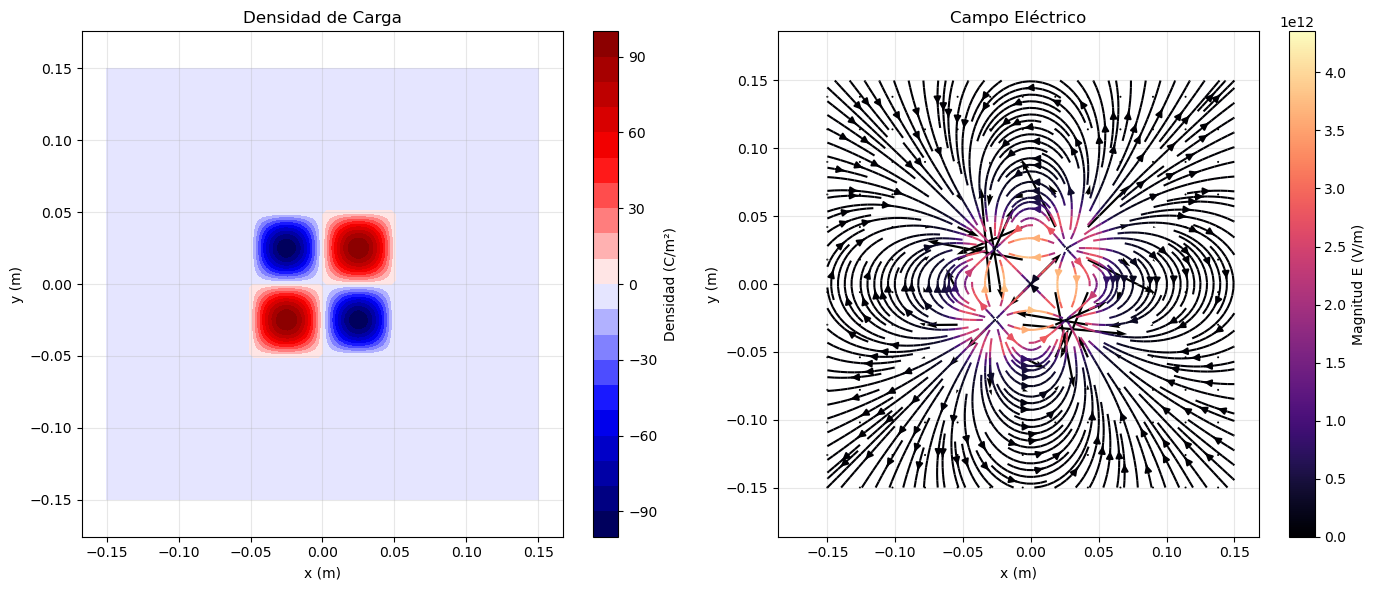

Potencial máximo: 3.60e+12 V
Campo máximo: 4.35e+12 V/m


In [12]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.9875e9
L = 0.1
q0 = 100.0

num_puntos = 101 
x = np.linspace(-0.15, 0.15, num_puntos) 
y = np.linspace(-0.15, 0.15, num_puntos) 
X, Y = np.meshgrid(x, y)

V = np.zeros_like(X)
Ex = np.zeros_like(X)
Ey = np.zeros_like(X)

N = 50
dL = L / N 
dA = dL * dL

x_carga = np.linspace(-L/2 + dL/2, L/2 - dL/2, N)
y_carga = np.linspace(-L/2 + dL/2, L/2 - dL/2, N)

for x_c in x_carga:
    for y_c in y_carga:
        densidad = q0 * np.sin(2 * np.pi * x_c / L) * np.sin(2 * np.pi * y_c / L)
        dq = densidad * dA

        rx = X - x_c
        ry = Y - y_c
        r = np.sqrt(rx**2 + ry**2)
        
        r = np.where(r < 1e-6, 1e-6, r)

        V += k * dq / r
        
        factor = k * dq / (r**3)
        Ex += factor * rx
        Ey += factor * ry

Emag = np.sqrt(Ex**2 + Ey**2)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sigma = q0 * np.sin(2*np.pi*X / L) * np.sin(2*np.pi*Y / L)
fuera = (np.abs(X) > L/2) | (np.abs(Y) > L/2)
sigma[fuera] = 0.0

plt.contourf(X, Y, sigma, levels=20, cmap="seismic")
plt.colorbar(label='Densidad (C/m²)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Densidad de Carga')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 2, 2)
strm = plt.streamplot(X, Y, Ex, Ey, color=Emag, cmap='magma', density=2, linewidth=1.5)
plt.colorbar(strm.lines, label='Magnitud E (V/m)') 

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo Eléctrico')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

print(f"Potencial máximo: {np.max(V):.2e} V")
print(f"Campo máximo: {np.max(Emag):.2e} V/m")

### 3. Procesamiento de imágenes y STM

Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no sólo de la intensidad de la luz, sino también del ángulo de incidencia.  
Si la luz forma un ángulo $\theta$ con la normal, sólo “ve” una fracción $\cos\theta$ de área, por unidad de área real en la superficie.

Así, la intensidad de la iluminación es $a \cos\theta$, si $a$ es la intensidad bruta de la luz.  
Esta simple ley física es un elemento central de los gráficos por computadora en 3D, pues permite calcular cómo incide la luz sobre objetos tridimensionales y, por tanto, cómo se verán al ser iluminados desde varios ángulos.

Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montañas.  
Conocemos la altura de las montañas $w(x, y)$ en función de la posición en el plano, por lo que la ecuación para la superficie de la Tierra es simplemente $z = w(x, y)$, o equivalentemente $w(x, y) - z = 0$, y el vector normal $\vec{v}$ a la superficie está dado por el gradiente de $w(x, y) - z$ de la siguiente manera:

$$
\vec{v} = \nabla [w(x, y) - z] =
\begin{pmatrix}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z}
\end{pmatrix}
[w(x, y) - z] =
\begin{pmatrix}
\frac{\partial w}{\partial x} \\
\frac{\partial w}{\partial y} \\
-1
\end{pmatrix}
$$

Ahora supongamos que tenemos luz entrante representada por un vector $\vec{a}$ con magnitud igual a la intensidad de la luz.  
Entonces, el producto escalar de los vectores $\vec{a}$ y $\vec{v}$ es:

$$
\vec{a} \cdot \vec{v} = |\vec{a}| |\vec{v}| \cos\theta
$$

donde $\theta$ es el ángulo entre los vectores.

Entonces, la intensidad de la iluminación de la superficie de las montañas es:

$$
I = |\vec{a}| \cos\theta = \frac{\vec{a} \cdot \vec{v}}{|\vec{v}|} =
\frac{a_x (\partial w/\partial x) + a_y (\partial w/\partial y) - a_z}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}
$$

Tomemos un caso simple donde la luz brilla horizontalmente con intensidad unitaria, a lo largo de una línea en un ángulo $\phi$ en sentido contrario a las manecillas del reloj desde el eje este-oeste, de modo que $\vec{a} = (\cos\phi, \sin\phi, 0)$.  
Entonces nuestra intensidad de iluminación se simplifica a:

$$
I = \frac{\cos\phi \, (\partial w/\partial x) + \sin\phi \, (\partial w/\partial y)}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}
$$

Así, si podemos calcular las derivadas de la altura $w(x, y)$ y sabemos $\phi$, entonces podemos calcular la intensidad en cualquier punto.

_a)_ El archivo adjunto `altitudes.txt` contiene la altitud $w(x, y)$ en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos $(x, y)$. Escribe un programa que lea este archivo y almacene los datos en una matriz. Luego calcula las derivadas $\partial w/\partial x$ y $\partial w/\partial y$ en cada punto de la cuadrícula. Explica qué método utilizaste para calcularlos y por qué.  
*(Hint: probablemente tendrás que usar más de un método para obtener cada punto de la cuadrícula porque suceden cosas incómodas en los bordes de la misma.)* Para calcular las derivadas, necesitarás saber el valor de $h$ y la distancia en metros entre puntos de la cuadrícula, que es de aproximadamente $30{,}000\,\text{m}$ en este caso.

In [10]:
import numpy as np

datos = np.loadtxt('altitudes.txt')
print(f"Tamaño de la matriz: {datos.shape}")

# Distancia entre puntos (30 km = 30,000 m)
h = 30000

dw_dx = np.zeros_like(datos)
dw_dy = np.zeros_like(datos)

# Puntos interiores con diferencias centrales
for i in range(1, datos.shape[0]-1):
    for j in range(1, datos.shape[1]-1):
        dw_dx[i,j] = (datos[i, j+1] - datos[i, j-1]) / (2 * h)
        dw_dy[i,j] = (datos[i+1, j] - datos[i-1, j]) / (2 * h)

# Bordes con diferencias hacia adelante/atrás
for i in range(1, datos.shape[0]-1):
    dw_dx[i,0] = (datos[i, 1] - datos[i, 0]) / h
    dw_dx[i,-1] = (datos[i, -1] - datos[i, -2]) / h

for j in range(1, datos.shape[1]-1):
    dw_dy[0,j] = (datos[1, j] - datos[0, j]) / h
    dw_dy[-1,j] = (datos[-1, j] - datos[-2, j]) / h

# Esquinas
dw_dx[0,0] = (datos[0,1] - datos[0,0]) / h
dw_dy[0,0] = (datos[1,0] - datos[0,0]) / h
dw_dx[0,-1] = (datos[0,-1] - datos[0,-2]) / h
dw_dy[0,-1] = (datos[1,-1] - datos[0,-1]) / h
dw_dx[-1,0] = (datos[-1,1] - datos[-1,0]) / h
dw_dy[-1,0] = (datos[-1,0] - datos[-2,0]) / h
dw_dx[-1,-1] = (datos[-1,-1] - datos[-1,-2]) / h
dw_dy[-1,-1] = (datos[-1,-1] - datos[-2,-1]) / h

np.save('derivadas.npy', datos)
np.save('dw_dx.npy', dw_dx)
np.save('dw_dy.npy', dw_dy)

print(f"∂w/∂x - Mínimo: {np.min(dw_dx):.2e}, Máximo: {np.max(dw_dx):.2e}")
print(f"∂w/∂y - Mínimo: {np.min(dw_dy):.2e}, Máximo: {np.max(dw_dy):.2e}")

Tamaño de la matriz: (512, 1024)
∂w/∂x - Mínimo: -1.32e-01, Máximo: 1.13e-01
∂w/∂y - Mínimo: -1.13e-01, Máximo: 1.12e-01


**Para calcular derivadas:**

**Puntos interiores**: Usé diferencias centrales: `[f(x+h) - f(x-h)] / (2h)`, ya que esto es más preciso porque usa información de ambos lados

**Puntos en los bordes**: Diferencias hacia adelante/atrás: `[f(x+h) - f(x)] / h`. ya que en los bordes no tenemos puntos a ambos lados, así que usamos lo que hay disponible

Y ya vimos que el metodo de diferencias centrales es el mas preciso que hay

_b)_ Ahora, usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con $\phi = 45^\circ$, y haz un gráfico de densidad de los valores resultantes en el que el brillo de cada punto depende de la correspondiente valor de intensidad. Si lo haces funcionar correctamente, la gráfica debería verse como un mapa en relieve del mundo; deberías poder ver los continentes y las cadenas montañosas en 3D. (Algunos de los problemas comunes al hacer esto pueden ser: un mapa que está al revés o de lado, o un mapa en el que el relieve está “de adentro hacia afuera”, lo que significa que las regiones altas se ven bajas y *vice-versa*. Trabaja con los detalles de tu programa hasta que obtengas un mapa que te parezca adecuado.) Hint: Ten en cuenta que el valor de la intensidad $I$ de la fórmula anterior puede ser positivo o negativo; oscila entre $+1$ y $-1$. ¿Qué significa una intensidad negativa? Significa que el área en cuestión está en sombras (es decir, que se encuentra en el lado equivocado de la montaña para recibir alguna luz). Podrías representar esto coloreando esas áreas del mapa completamente de negro, aunque en la práctica obtendrás una imagen más bonita (aunque tal vez menos realista) simplemente usando una gama continua de grises desde $+1$ hasta $-1$.

Intensidad mínima: -0.135
Intensidad máxima: 0.104


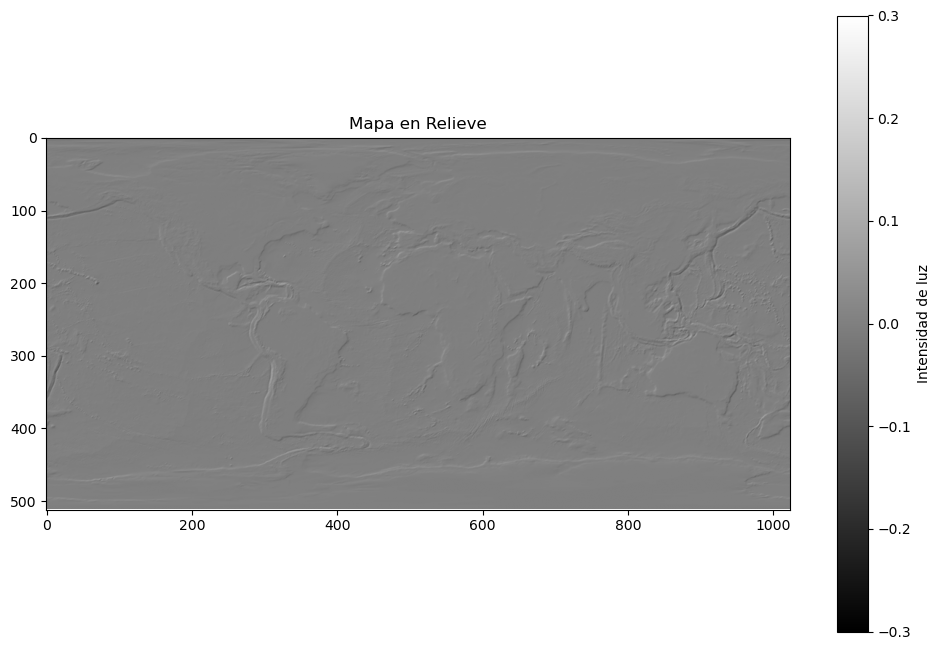

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los resultados del inciso A
datos = np.load('derivadas.npy')
dw_dx = np.load('dw_dx.npy')
dw_dy = np.load('dw_dy.npy')

# Ángulo de la luz (45°)
phi = 45
cos_phi = np.cos(np.radians(phi))
sin_phi = np.sin(np.radians(phi))

# Calcular intensidad
I = np.zeros_like(datos)
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        numerador = cos_phi * dw_dx[i,j] + sin_phi * dw_dy[i,j]
        denominador = np.sqrt(dw_dx[i,j]**2 + dw_dy[i,j]**2 + 1)
        I[i,j] = numerador / denominador

print(f"Intensidad mínima: {np.min(I):.3f}")
print(f"Intensidad máxima: {np.max(I):.3f}")

plt.figure(figsize=(12, 8))
plt.imshow(I, cmap="grey", vmin=-0.3, vmax=0.3)
plt.colorbar(label='Intensidad de luz')
plt.title(f'Mapa en Relieve')
plt.show()

_c_) El otro archivo adjunto `stm.txt` contiene una cuadrícula con valores de mediciones de un microscopio de efecto túnel (STM) de la superficie (111) del silicio.  
Un microscopio de efecto túnel (STM) mide la forma de superficies a nivel atómico siguiendo una punta afilada sobre la superficie y midiendo la corriente de efecto túnel cuántico en función de la posición.  
El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición, y los datos del archivo `stm.txt` contienen precisamente esa rejilla de valores.  
Modifica tu programa anterior para visualizar los datos STM y así crear una imagen 3D de cómo se ve la superficie de silicio.  
El valor de $h$ para las derivadas en este caso es aproximadamente $h = 2.5$ (en unidades arbitrarias).

Tamaño de la matriz STM: (663, 676)
Datos STM - Mínimo: 1.600, Máximo: 43.250


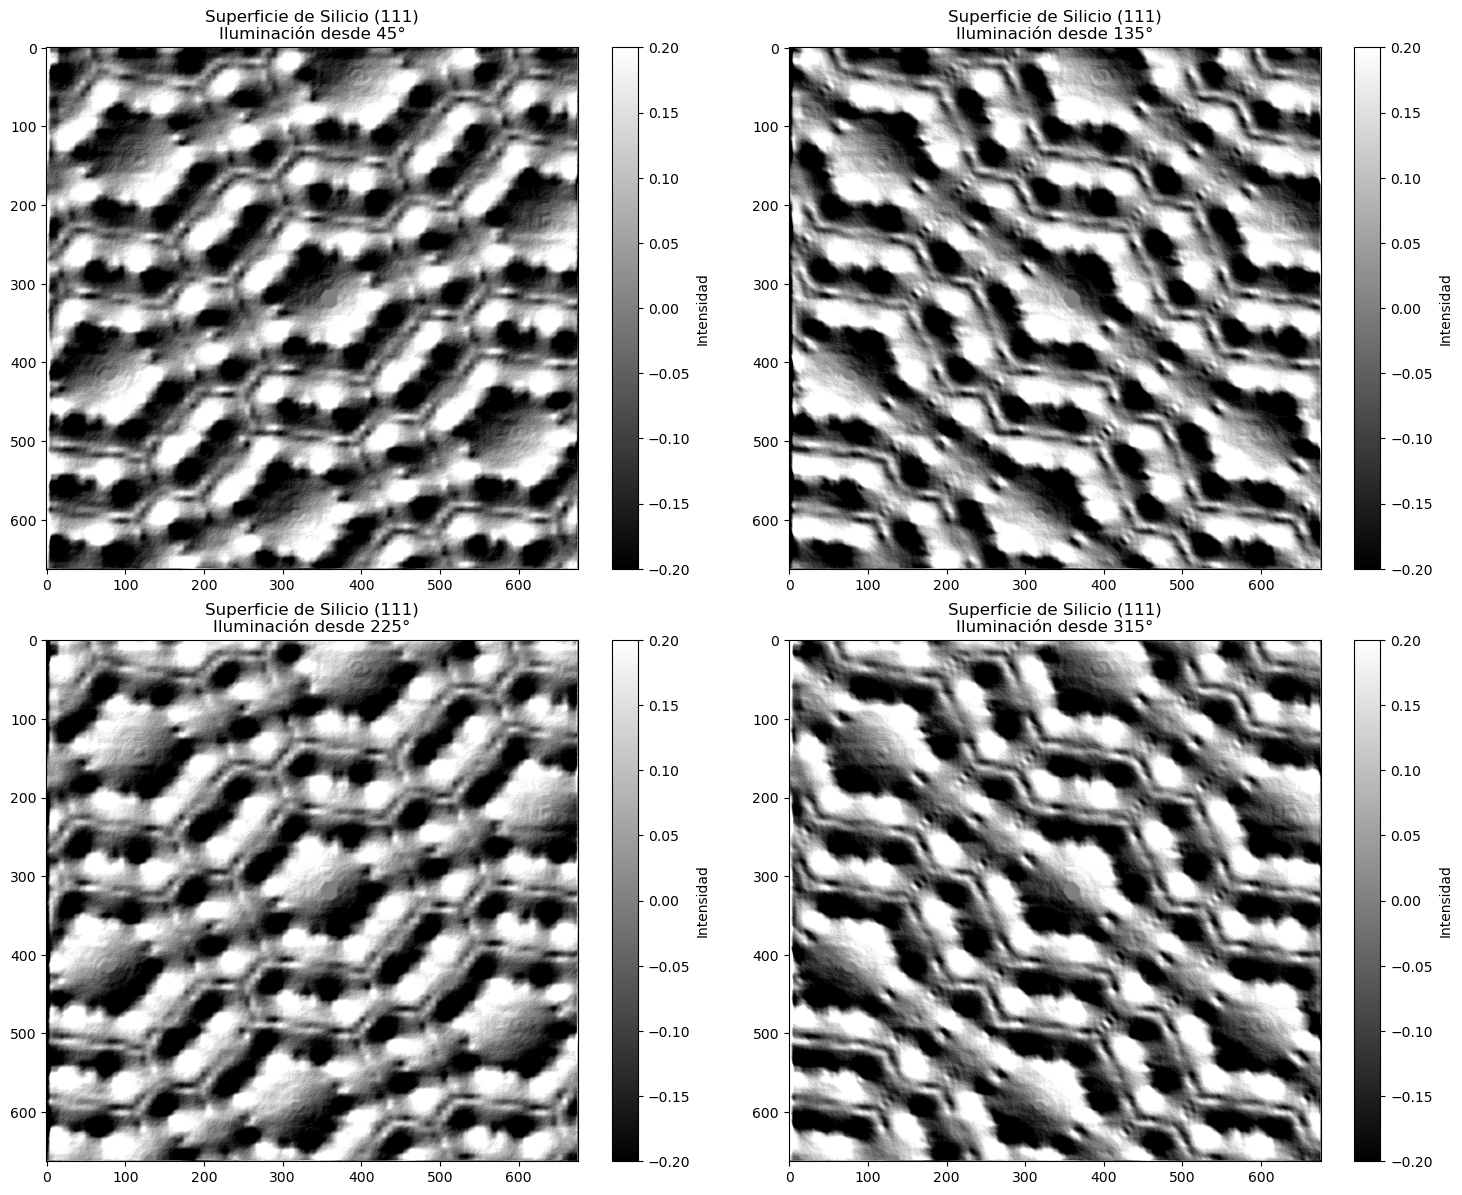

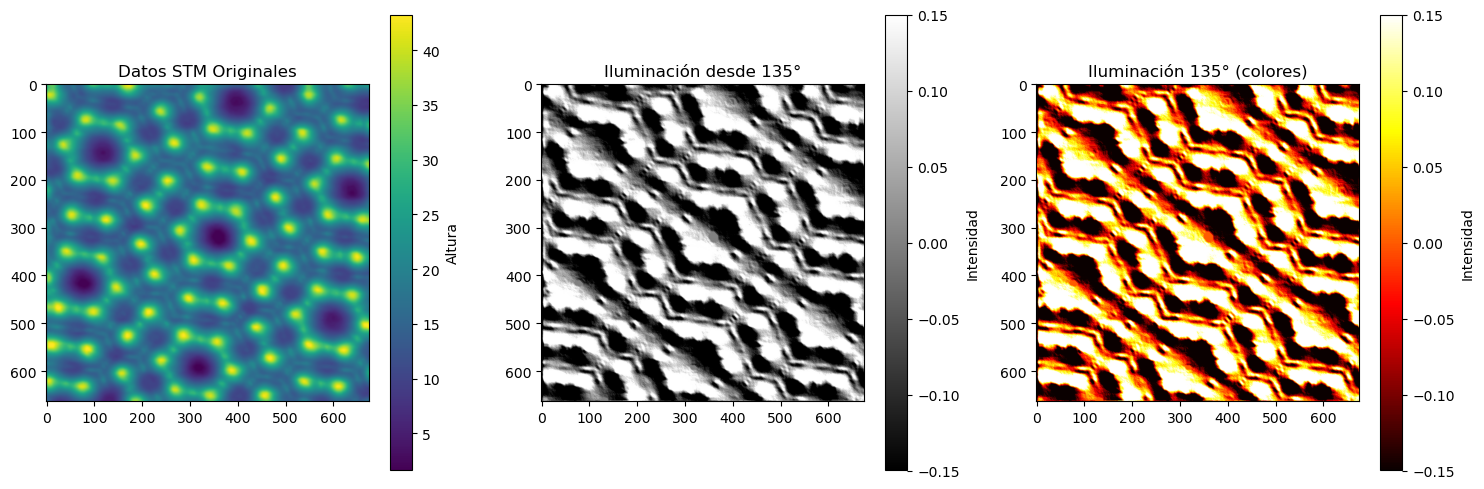

In [9]:
import numpy as np
import matplotlib.pyplot as plt

datos_stm = np.loadtxt('stm.txt')
print(f"Tamaño de la matriz STM: {datos_stm.shape}")

# Valor de h para las derivadas
h = 2.5

dw_dx = np.zeros_like(datos_stm)
dw_dy = np.zeros_like(datos_stm)

# Puntos interiores con diferencias centrales
for i in range(1, datos_stm.shape[0]-1):
    for j in range(1, datos_stm.shape[1]-1):
        dw_dx[i,j] = (datos_stm[i, j+1] - datos_stm[i, j-1]) / (2 * h)
        dw_dy[i,j] = (datos_stm[i+1, j] - datos_stm[i-1, j]) / (2 * h)

# Bordes con diferencias hacia adelante/atrás
for i in range(1, datos_stm.shape[0]-1):
    dw_dx[i,0] = (datos_stm[i, 1] - datos_stm[i, 0]) / h
    dw_dx[i,-1] = (datos_stm[i, -1] - datos_stm[i, -2]) / h

for j in range(1, datos_stm.shape[1]-1):
    dw_dy[0,j] = (datos_stm[1, j] - datos_stm[0, j]) / h
    dw_dy[-1,j] = (datos_stm[-1, j] - datos_stm[-2, j]) / h

# Esquinas
dw_dx[0,0] = (datos_stm[0,1] - datos_stm[0,0]) / h
dw_dy[0,0] = (datos_stm[1,0] - datos_stm[0,0]) / h
dw_dx[0,-1] = (datos_stm[0,-1] - datos_stm[0,-2]) / h
dw_dy[0,-1] = (datos_stm[1,-1] - datos_stm[0,-1]) / h
dw_dx[-1,0] = (datos_stm[-1,1] - datos_stm[-1,0]) / h
dw_dy[-1,0] = (datos_stm[-1,0] - datos_stm[-2,0]) / h
dw_dx[-1,-1] = (datos_stm[-1,-1] - datos_stm[-1,-2]) / h
dw_dy[-1,-1] = (datos_stm[-1,-1] - datos_stm[-2,-1]) / h

print(f"Datos STM - Mínimo: {np.min(datos_stm):.3f}, Máximo: {np.max(datos_stm):.3f}")

# Probar diferentes ángulos de iluminación para mejor visualización
angulos = [45, 135, 225, 315]

plt.figure(figsize=(15, 12))

for idx, phi in enumerate(angulos, 1):
    cos_phi = np.cos(np.radians(phi))
    sin_phi = np.sin(np.radians(phi))
    
    # Calcular intensidad
    I = np.zeros_like(datos_stm)
    for i in range(datos_stm.shape[0]):
        for j in range(datos_stm.shape[1]):
            numerador = cos_phi * dw_dx[i,j] + sin_phi * dw_dy[i,j]
            denominador = np.sqrt(dw_dx[i,j]**2 + dw_dy[i,j]**2 + 1)
            I[i,j] = numerador / denominador
    
    # Gráfica
    plt.subplot(2, 2, idx)
    plt.imshow(I, cmap='gray', vmin=-0.2, vmax=0.2)
    plt.colorbar(label='Intensidad')
    plt.title(f'Superficie de Silicio (111)\nIluminación desde {phi}°')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(datos_stm, cmap='viridis')
plt.colorbar(label='Altura')
plt.title('Datos STM Originales')

phi_mejor = 135
cos_phi = np.cos(np.radians(phi_mejor))
sin_phi = np.sin(np.radians(phi_mejor))

I_mejor = np.zeros_like(datos_stm)
for i in range(datos_stm.shape[0]):
    for j in range(datos_stm.shape[1]):
        numerador = cos_phi * dw_dx[i,j] + sin_phi * dw_dy[i,j]
        denominador = np.sqrt(dw_dx[i,j]**2 + dw_dy[i,j]**2 + 1)
        I_mejor[i,j] = numerador / denominador

plt.subplot(1, 3, 2)
plt.imshow(I_mejor, cmap='gray', vmin=-0.15, vmax=0.15)
plt.colorbar(label='Intensidad')
plt.title(f'Iluminación desde {phi_mejor}°')

plt.subplot(1, 3, 3)
plt.imshow(I_mejor, cmap='hot', vmin=-0.15, vmax=0.15)
plt.colorbar(label='Intensidad')
plt.title(f'Iluminación {phi_mejor}° (colores)')

plt.tight_layout()
plt.show()